# Project: Movies data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src='civer.jpg'>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) is a community built movie and TV database which containr more than 10,000 records (movies) describing a lot of features for each movie - popularity	budget	revenue	original_title cast homepage director tagline etc. Based on those features, we can solve a lot of problems and get a lot of insights.

In this analysis we will try to understand the answers of these two questions:
1. Which metrics lead the movies to highest ratings?
2. Which autors and the directors are the most popular

In [253]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# getting the data
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Keep only the fields we're gonna use for answering the questions

### Functions

Function which describes the shape of the given dataframe

In [254]:
def shapeOfDf(dd):
    print('The dataset has '+str(dd.shape[0])+' rows and '+str(dd.shape[1])+' columns')

Remove the outliers (fills outliers with Nulls)

In [255]:
def fillOutliersNull(given_db, given_feature):
    return given_db[given_feature].apply(lambda x: None if ((x < given_db[given_feature].quantile(.25)) | (x > given_db[given_feature].quantile(.75))) else x)

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will check for cleanliness, and then trim and clean our dataset for analysis. 

Dataframe Shape

In [256]:
shapeOfDf(df)

The dataset has 10866 rows and 21 columns


Information about the dataframe including the index data types and columns, non-null values and memory usage

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<h3>Insights:</h3>
<ul>
    <li> There are 8 columns that have NULL values
    but all of them are strings so we can't fill them 
    with mean.
    <li> release_date dtype can be changed to datetime
</ul>

Now, let's get some descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [258]:
df.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We also need to visualize the destributions of each feature

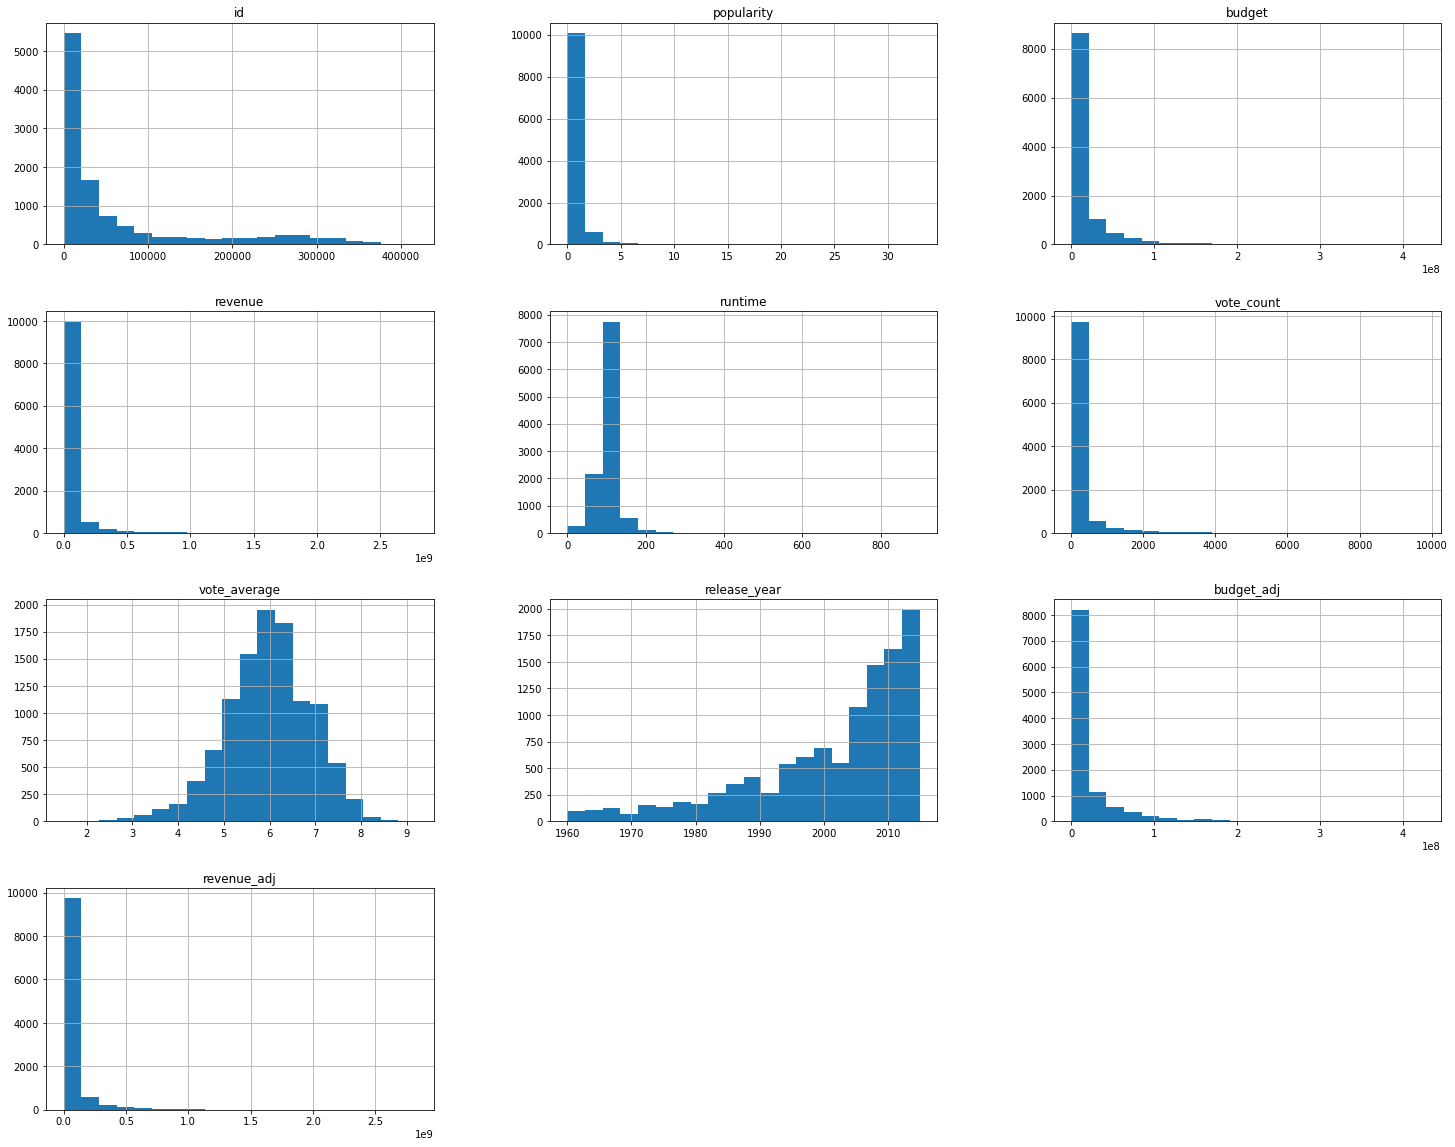

In [259]:
df.hist(figsize=(25,20), bins=20);

### popularity

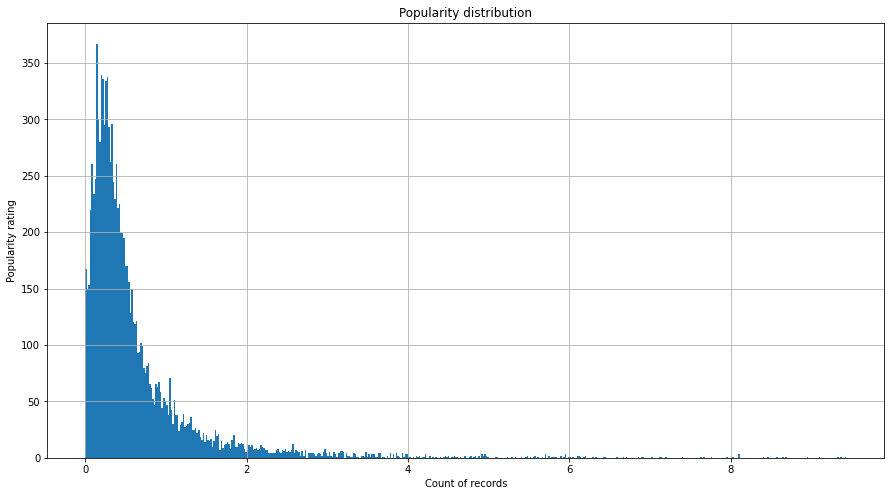

In [260]:
df[df['popularity']<10]['popularity'].hist(bins=500, figsize=(15,8))
plt.title('Popularity distribution')
plt.xlabel("Count of records")
plt.ylabel("Popularity rating");

Very small percent of movies have popularity higher than 1

### budget

In [261]:
df['budget'].value_counts().head()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
Name: budget, dtype: int64

We have 5696 (52)  movies with 0 budget

### revenue

In [262]:
df['revenue'].value_counts().head()

0           6016
12000000      10
10000000       8
11000000       7
5000000        6
Name: revenue, dtype: int64

The same for revenue - 6016 (55%)

### runtime

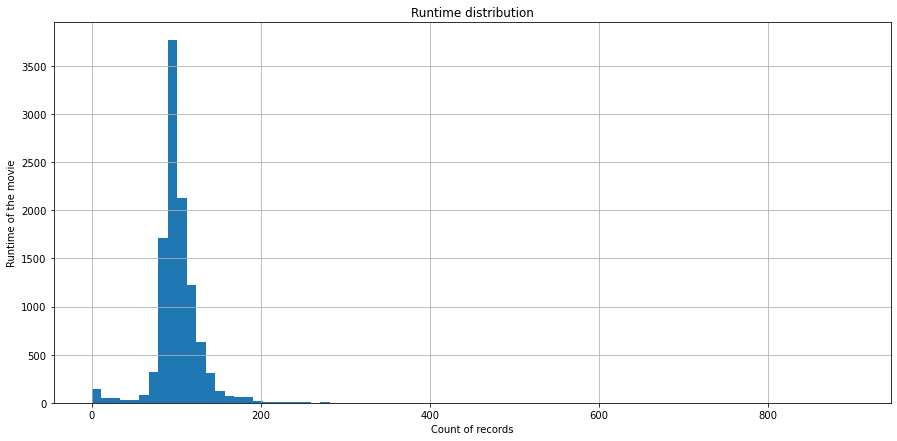

In [263]:
df['runtime'].hist(figsize=(15,7), bins=80)
plt.title('Runtime distribution')
plt.xlabel("Count of records")
plt.ylabel("Runtime of the movie");

The same for revenue - 6016 (55%)

3330


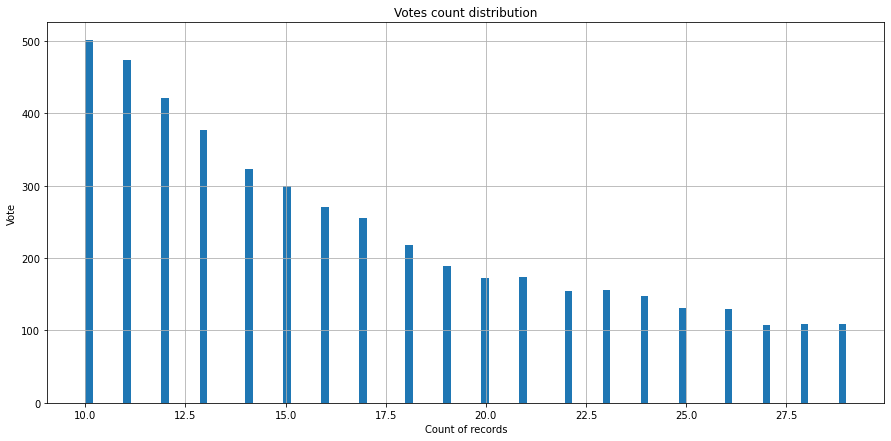

In [264]:
df[df['vote_count']<30]['vote_count'].hist(figsize=(15,7), bins=100)
plt.title('Votes count distribution')
plt.xlabel("Count of records")
plt.ylabel("Vote");
print(len(df[df['vote_count']<20]))

Min count of voters are 10 and even though 3330 of them (30%) are less than 20 votes. This makes vote_count feature to be fair in general

### avg vote

In [265]:
df['vote_average'].unique()

array([6.5, 7.1, 6.3, 7.5, 7.3, 7.2, 5.8, 7.6, 8. , 6.2, 5.2, 7.4, 6.1,
       7. , 6.8, 5.3, 7.8, 6.4, 6.6, 7.7, 5.6, 6.9, 5.9, 6.7, 5.5, 5. ,
       4.4, 5.4, 5.1, 4.8, 5.7, 4.1, 3.9, 4.5, 6. , 4.2, 3.6, 4.3, 4.9,
       4.7, 4. , 3.5, 3.8, 3.3, 3.7, 4.6, 7.9, 8.2, 2.6, 3.1, 8.9, 3.2,
       2.4, 8.4, 3. , 2.8, 3.4, 8.8, 8.1, 8.3, 2.7, 2.5, 2.1, 8.6, 2.9,
       8.5, 9.2, 2.2, 2. , 8.7, 2.3, 1.5])

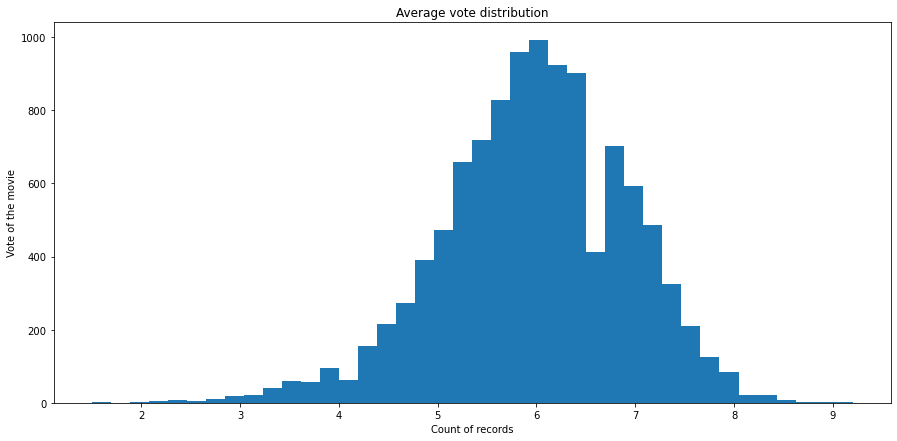

In [266]:
df['vote_average'].plot(kind='hist', figsize=(15,7), bins=40)
plt.title('Average vote distribution')
plt.xlabel("Count of records")
plt.ylabel("Vote of the movie");

vote_average has  normal distribution

<h3>insights</h3>
<ul>
    <li>Very small percent of movies have popularity higher than 3 </li>
    <li>We have 5696 (52)  movies with 0 budget </li>
    <li>The same for revenue - 6016 (55%)</li>
    <li>Vote avearge has normal destribution. In average movies last 102 minutes with 31 standard deviation</li>
    <li>Min count of voters are 10 and even though 3330 of them (30%) are less than 20 votes. This makes vote_count feature to be fair in general </li>
    <li>Movies are beng released more over time</li>
    <li>Average votes have normal distribution  </li>
</ul>

### Data Cleaning 

Check and remove duplicates

In [267]:
sum(df.duplicated())

1

In [268]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

Rows with all null values

In [269]:
df[df.isnull().all(axis=1)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


There's not a row with all Null values

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which metrics lead the movies to highest ratings?

First of all, let's create a scatter matrix which will show 
not only correlations between each feature with the average vote
but also to each other.


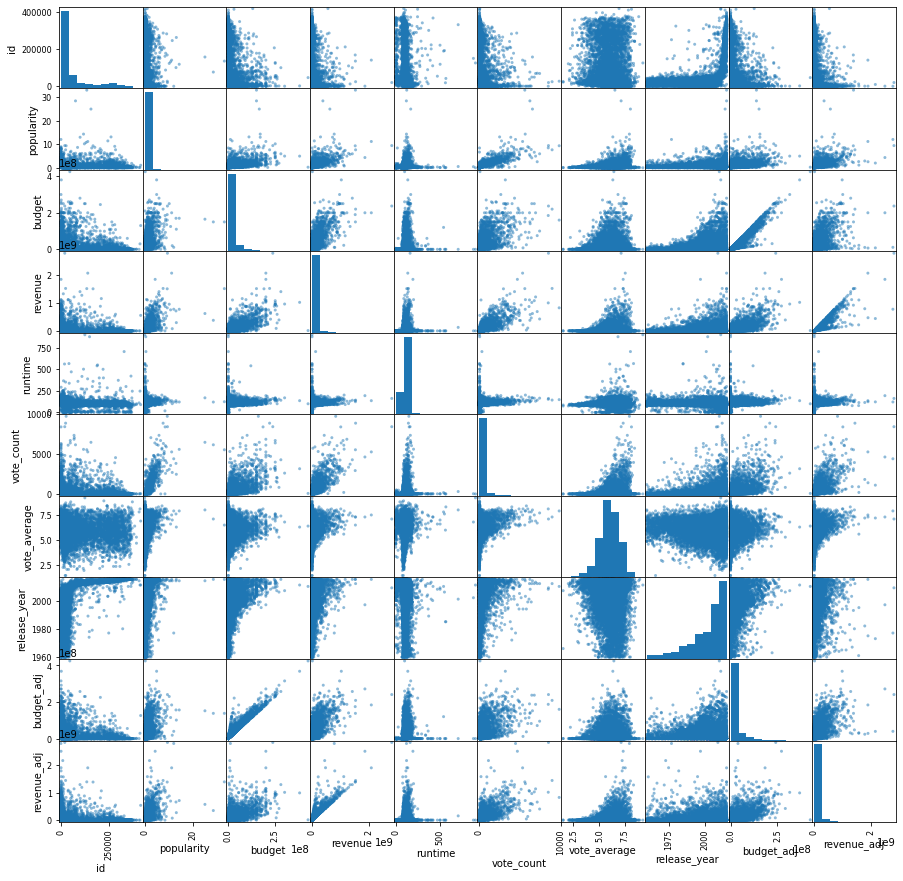

In [270]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

#### Missing values

Why we don't need to remove the null values in the dataset, because they all are string (cast, director, genres) and have no affect on the correlation matrix.

#### Outliers

As we remember, we have some 0 values in budget and revenue. 
We can consider them as outliers and remove them from the dataset and see the new shape of th DF.

In [271]:
df_for_corr = df[(df['budget']!=0) | (df['revenue']!=0)]
df_for_corr.shape

(6164, 21)

Let's see the new shape of the db

Now that we handled with tme missing values and outliers
we can see the relationship between features with numbers

In [272]:
corr = df_for_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.097466,-0.089067,-0.056946,-0.050600,0.039674,-0.053892,0.498614,-0.163516,-0.119211
popularity,0.097466,1.000000,0.494881,0.643245,0.188566,0.794865,0.286419,0.145824,0.453440,0.580554
budget,-0.089067,0.494881,1.000000,0.703985,0.247462,0.593890,0.075955,0.201225,0.962756,0.571048
revenue,-0.056946,0.643245,0.703985,1.000000,0.217289,0.774295,0.222333,0.098735,0.671544,0.910985
runtime,-0.050600,0.188566,0.247462,0.217289,1.000000,0.227379,0.304254,-0.102071,0.301070,0.238622
vote_count,0.039674,0.794865,0.593890,0.774295,0.227379,1.000000,0.335763,0.166473,0.540531,0.682486
vote_average,-0.053892,0.286419,0.075955,0.222333,0.304254,0.335763,1.000000,-0.131413,0.092220,0.252492
release_year,0.498614,0.145824,0.201225,0.098735,-0.102071,0.166473,-0.131413,1.000000,0.048267,-0.085407
budget_adj,-0.163516,0.453440,0.962756,0.671544,0.301070,0.540531,0.092220,0.048267,1.000000,0.597339
revenue_adj,-0.119211,0.580554,0.571048,0.910985,0.238622,0.682486,0.252492,-0.085407,0.597339,1.000000


In [273]:
corr[['vote_average']].sort_values('vote_average', ascending=False)

,vote_average
vote_average,1.000000
vote_count,0.335763
runtime,0.304254
popularity,0.286419
revenue_adj,0.252492
revenue,0.222333
budget_adj,0.092220
budget,0.075955
id,-0.053892
release_year,-0.131413


The highest correlation with the average vote has vote_counts (0.33), and then it comes for runtime (0.30) then the popularity (0.28)

### Research Question 2: Which autors and the directors are the most popular

First of all - let's keep only the needed features

In [274]:
df_stars = df[['cast','director','popularity']]

In [275]:
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cast        10789 non-null  object 
 1   director    10821 non-null  object 
 2   popularity  10865 non-null  float64
dtypes: float64(1), object(2)
memory usage: 339.5+ KB


Drop the fields with NULL values

In [276]:
df_stars = df_stars.dropna(how='any')

In [277]:
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10751 entries, 0 to 10865
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cast        10751 non-null  object 
 1   director    10751 non-null  object 
 2   popularity  10751 non-null  float64
dtypes: float64(1), object(2)
memory usage: 336.0+ KB


In [278]:
df_stars.head()

,cast,director,popularity
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,32.985763
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,28.419936
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,13.112507
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,11.173104
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,9.335014


The plan is to get each star (director and artist) and count the mean popularity for each of them.
We will need to transform the data which will thave the following columns

name, role, popularity

In [279]:
stars_data = {'name': [], 'role': [], 'popularity':[]}

create dictionary for for <b>artists</b>

In [280]:
stars_data = {'name': [], 'role': [], 'popularity':[]}
for i in df_stars[['cast','popularity']].values: 
    for k in i[0].split('|'):
        stars_data["name"].append(k)
        stars_data["role"].append('artist')
        stars_data["popularity"].append(i[1])


create dictionary for for <b>directors</b>

In [281]:
for i in df_stars[['director','popularity']].values:
    for k in i[0].split('|'):
        stars_data["name"].append(k)
        stars_data["role"].append('director')
        stars_data["popularity"].append(i[1])

In [282]:
new_df = pd.DataFrame(data=stars_data)
new_df.head()

,name,role,popularity
0,Chris Pratt,artist,32.985763
1,Bryce Dallas Howard,artist,32.985763
2,Irrfan Khan,artist,32.985763
3,Vincent D'Onofrio,artist,32.985763
4,Nick Robinson,artist,32.985763


Most popular <b>artists</b>

In [283]:
new_df[new_df['role']=='artist'].groupby(['name'])['popularity'].mean().to_frame().reset_index().sort_values('popularity', axis=0, ascending=False).head(5)

,name,popularity
9398,Josh Helman,28.419936
3888,Daisy Ridley,11.173104
7157,Hugh Keays-Byrne,10.211471
15840,Ryan Potter,8.691294
4026,Daniel Henney,8.691294


Most popular <b>directors</b>

In [284]:
new_df[new_df['role']=='director'].groupby(['name'])['popularity'].mean().to_frame().reset_index().sort_values('popularity', axis=0, ascending=False).head(5)

,name,popularity
950,Colin Trevorrow,16.696886
1189,David Leitch,11.422751
751,Chad Stahelski,11.422751
2787,Juno John Lee,8.411577
102,Alan Taylor,6.883129


<h1>Conclusion</h1>
<h3>Result:</h3>

1. The higest votes have the movies wich have higher vote_counts, runtime and popularity.
2. The most popular artist is Josh Helman and the most popular director is Colin Trevorrow.

<h3>Limitations:</h3>

1. Most of the variables are not corelated to each other and would be great to also have ratings and other metrics from different websites such as IMDb, kinopoist etc.
2. There are a lot of missing or zero values in some features which makes different to get reliable insights.